



Tree Counter Detection using Watershed Algorithm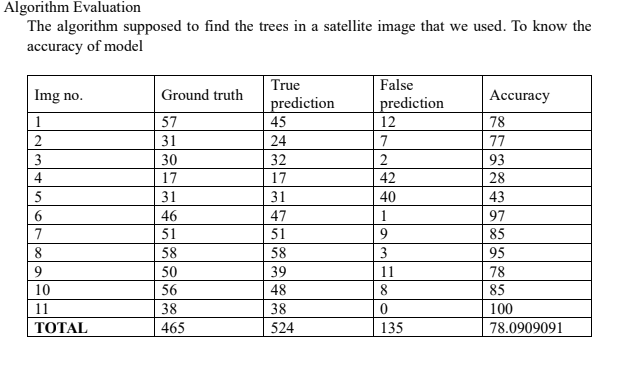




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

1. Watershed Algorithm

The standard pipeline for this is:
*   Loading Image
*   Blurring the image
*   Converting image to Grayscale
*   Thresholding
*   Noise Removal
*   Blurring the image
*   Getting the sure background
*   Distance Tranform
*   Getting the sure foreground
*   Subtracing sure foreground to sure background to get unknown areas.
*   Blurring the image
*   Labeling markers on separate regions in sure foreground
*   Perform the watershed algorithm




In [ ]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

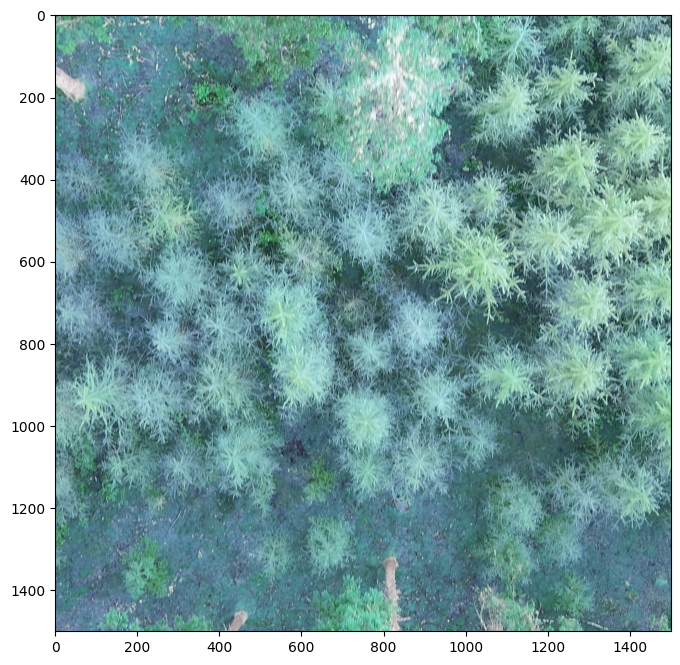

In [ ]:
img = cv2.imread('/content/drive/MyDrive/trees/B01_0004.JPG')
orig_img = img.copy()
display(img)

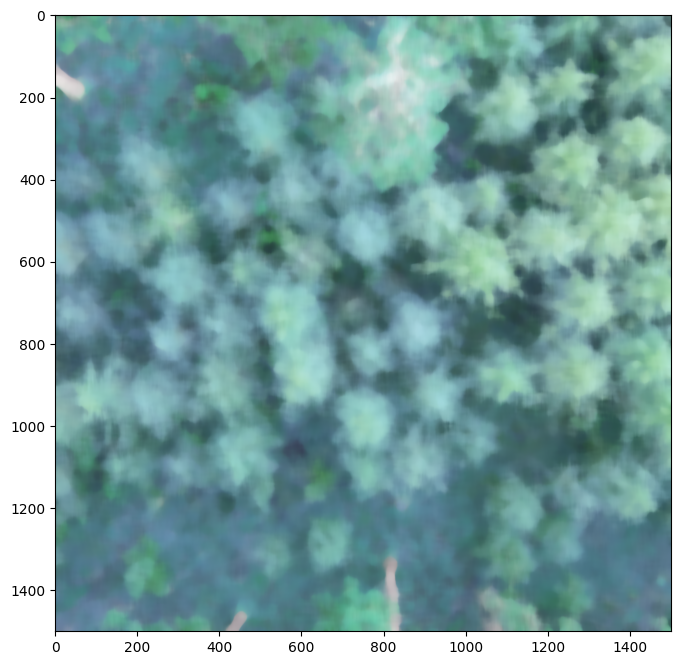

In [ ]:
img = cv2.medianBlur(img,25)
display(img)

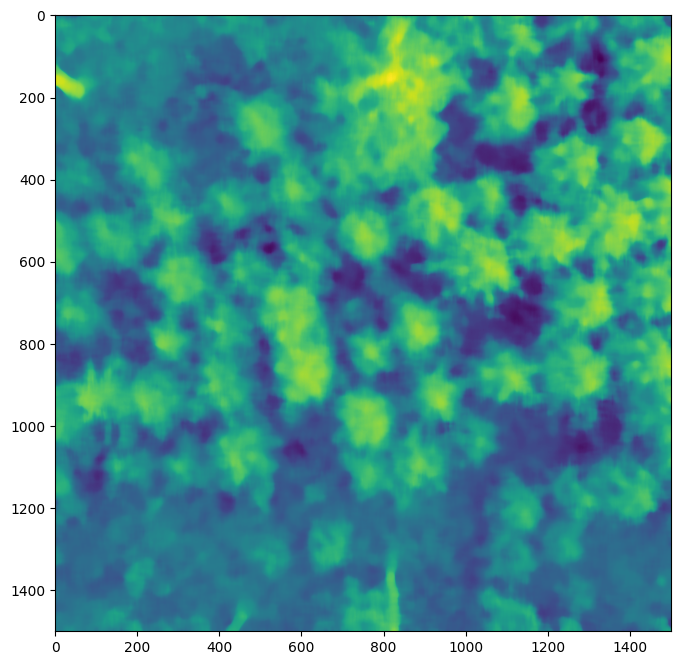

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray)

In [ ]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
thresh = cv2.bitwise_not(thresh)

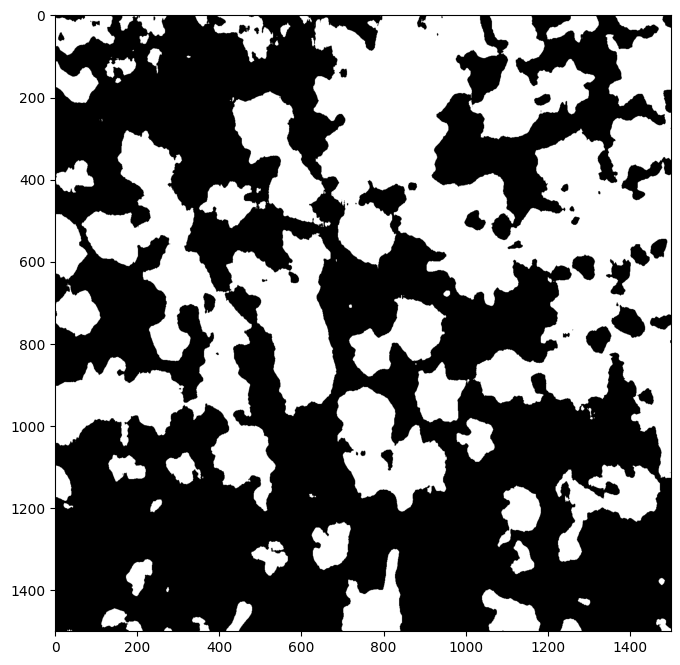

In [ ]:
display(thresh,cmap='gray')

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [ ]:
display(opening,cmap='gray')

In [ ]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [ ]:
display(sure_bg,cmap='gray')

In [ ]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),200,170)

In [ ]:
display(dist_transform,cmap='gray')

In [ ]:
display(sure_fg,cmap='gray')

In [ ]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [ ]:
display(unknown,cmap='gray')

In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [ ]:
display(markers,cmap='gray')


In [ ]:
markers = cv2.watershed(img,markers)

In [ ]:
display(markers)

In [ ]:

contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):

    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:

        # We can now draw the external contours from the list of contours
        cv2.drawContours(orig_img, contours, i, (255, 0, 0), 10)


In [ ]:
display(orig_img)

In [ ]:
def count_objects(img, sure_fg):
    ls = []
    w = img.shape[0]
    h = img.shape[1]
    output = cv2.connectedComponentsWithStats(sure_fg)

    for r in output[2]:
        if r[2] != h and r[3] != w:
            ls.append(r)
    return len(ls)

print("The number of trees:", count_objects(orig_img, sure_fg))

The number of trees: 67


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

def watershed(img):
  img = cv2.imread(img)
  orig_img = img.copy()
  img = cv2.medianBlur(img,35)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  thresh = cv2.bitwise_not(thresh)
  # noise removal
  kernel = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
  # sure background area
  sure_bg = cv2.dilate(opening,kernel,iterations=3)
  # Finding sure foreground area
  dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),200,170)
  # Finding unknown region
  sure_fg = np.uint8(sure_fg)
  unknown = cv2.subtract(sure_bg,sure_fg)
  # Marker labelling
  ret, markers = cv2.connectedComponents(sure_fg)
  # Add one to all labels so that sure background is not 0, but 1
  markers = markers+1
  # Now, mark the region of unknown with zero
  markers[unknown==255] = 0
  markers = cv2.watershed(img,markers)
  contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

  # For every entry in contours
  for i in range(len(contours)):

      # last column in the array is -1 if an external contour (no contours inside of it)
      if hierarchy[0][i][3] == -1:

          # We can now draw the external contours from the list of contours
          cv2.drawContours(orig_img, contours, i, (255, 0, 0), 10)


  print("The number of trees:", count_objects(orig_img, sure_fg))
  display(orig_img)

def count_objects(img, sure_fg):
    ls = []
    w = img.shape[0]
    h = img.shape[1]
    output = cv2.connectedComponentsWithStats(sure_fg)

    for r in output[2]:
        if r[2] != h and r[3] != w:
            ls.append(r)
    return len(ls)


In [ ]:
import os
import cv2

# Specify the base directory path
base_directory = "/content/drive/MyDrive/trees"

# Iterate through files in the directory
for filename in os.listdir(base_directory):
    if filename.endswith(('.png', '.JPG', '.jpeg')):
        # Construct the full path by concatenating the base directory and filename
        full_path = os.path.join(base_directory, filename)



        print(f"Processing image: {full_path}")
        # Image processing code here using the 'full_path'
        watershed(full_path)


    else:
        print(f"Skipping non-image file: {filename}")


Output hidden; open in https://colab.research.google.com to view.

In [1]:
from tabulate import tabulate

data = [
    ["Img no.", "Ground truth", "True prediction", "False prediction", "Accuracy"],
    [1, 57, 45, 12, 78],
    [2, 31, 24, 7, 77],
    [3, 30, 32, 2, 93],
    [4, 17, 17, 42, 28],
    [5, 31, 31, 40, 43],
    [6, 46, 47, 1, 97],
    [7, 51, 51, 9, 85],
    [8, 58, 58, 3, 95],
    [9, 50, 39, 11, 78],
    [10, 56, 48, 8, 85],
    [11, 38, 38, 0, 100],
    ["TOTAL", 465, 524, 135, 78.09]
]

print(tabulate(data, headers="firstrow"))
#data after tabulating results for ground truth vs predicted truth and their accuracy

Img no.      Ground truth    True prediction    False prediction    Accuracy
---------  --------------  -----------------  ------------------  ----------
1                      57                 45                  12       78
2                      31                 24                   7       77
3                      30                 32                   2       93
4                      17                 17                  42       28
5                      31                 31                  40       43
6                      46                 47                   1       97
7                      51                 51                   9       85
8                      58                 58                   3       95
9                      50                 39                  11       78
10                     56                 48                   8       85
11                     38                 38                   0      100
TOTAL                 465       